In [1]:
# kütüphaneleri import edelim
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter
# Python'da uyarıları kapatalım
import warnings
warnings.filterwarnings("ignore")

In [2]:
# veriyi içe aktaralım
veri = pd.read_csv("athlete_events.csv")
veri.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [3]:
veri.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


In [4]:
veri.columns

Index(['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games',
       'Year', 'Season', 'City', 'Sport', 'Event', 'Medal'],
      dtype='object')

In [5]:
veri.rename(columns={'ID'    : 'id',
                     'Name'  : 'isim',
                     'Sex'   : 'cinsiyet',
                     'Age'   : 'yas',
                     'Height': 'boy',
                     'Weight': 'kilo',
                     'Team'  : 'takım',
                     'NOC'   : 'uok',
                     'Games' : 'oyunlar',
                     'Year'  : 'yil',
                     'Season': 'sezon',
                     'City'  : 'sehir',
                     'Sport' : 'spor',
                     'Event' : 'etkinlik',
                     'Medal' : 'madalya'}, inplace = True)
veri.head(2)

,id,isim,cinsiyet,yas,boy,kilo,takım,uok,oyunlar,yil,sezon,sehir,spor,etkinlik,madalya
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN


In [6]:
# YARARSIZ VERİLERİN ÇIKARTILMASI
# drop fonksiyonu ile id ve oyunlar sütunlarını çıkartalım
veri = veri.drop(["id","oyunlar"], axis = 1) #axis =1 1 sütun manasında
veri.head(2)

,isim,cinsiyet,yas,boy,kilo,takım,uok,yil,sezon,sehir,spor,etkinlik,madalya
0,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN


In [7]:
#KAYIP VERİ SORUNU
veri.head()

,isim,cinsiyet,yas,boy,kilo,takım,uok,yil,sezon,sehir,spor,etkinlik,madalya
0,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [8]:
# Boy ve kilo sütunu kayıp veri bulma
essiz_etkinlik = pd.unique(veri.etkinlik)
print("Eşsiz Etkinlik Sayısı: {}".format(len(essiz_etkinlik)))
essiz_etkinlik[:10]

Eşsiz Etkinlik Sayısı: 765


array(["Basketball Men's Basketball", "Judo Men's Extra-Lightweight",
       "Football Men's Football", "Tug-Of-War Men's Tug-Of-War",
       "Speed Skating Women's 500 metres",
       "Speed Skating Women's 1,000 metres",
       "Cross Country Skiing Men's 10 kilometres",
       "Cross Country Skiing Men's 50 kilometres",
       "Cross Country Skiing Men's 10/15 kilometres Pursuit",
       "Cross Country Skiing Men's 4 x 10 kilometres Relay"], dtype=object)

In [9]:
# her bir etkinliği iteratif olarak dolaş
# etkinlik özelinde boy ve kilo ortalamalarını hesapla
# etkinlik özelinde kayıp boy ve kilo değerlerini etkinlik ortalamalarına eşitle

veri_gecici = veri.copy() # gerçek veriyi korumak için
boy_kilo_liste = ["boy", "kilo"]

for e in essiz_etkinlik: #liste içerisinde dolaş
    
    #etkinlik filtresi oluşturalım
    etkinlik_filtre = veri_gecici.etkinlik == e
    # veriyi etkinliğe göre filtreyelim
    veri_filtreli = veri_gecici[etkinlik_filtre]
    
    # boy ve kilo için etkinlik özelinde ortalamaları hesaplayalım
    for s in boy_kilo_liste:
        ortalama = np.round(np.mean(veri_filtreli[s]),2)
        if ~np.isnan(ortalama): #eğer etkinlik özelinde ortalama varsa
            veri_filtreli[s] = veri_filtreli[s].fillna(ortalama)
        else: # etkinlik özelinde ortalama varsa ortalamayı hesapla
            tum_veri_ortalamasi = np.round(np.mean(veri[s]),2)
    # etkinlik özelinde kayıp değerleri doldurmuş olan veriyi, veri_gecici ye aktarıyoruz
    veri_gecici[etkinlik_filtre] = veri_filtreli
    
# kayıp değerleri giderilmiş olan geöici veriyi gerçek veriye eşitleyelim
veri = veri_gecici.copy()
veri.info() # boy ve kilo sütunlarında kayıp değer sayısına bakalım

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 13 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   isim      271116 non-null  object 
 1   cinsiyet  271116 non-null  object 
 2   yas       261642 non-null  float64
 3   boy       269033 non-null  float64
 4   kilo      266456 non-null  float64
 5   takım     271116 non-null  object 
 6   uok       271116 non-null  object 
 7   yil       271116 non-null  int64  
 8   sezon     271116 non-null  object 
 9   sehir     271116 non-null  object 
 10  spor      271116 non-null  object 
 11  etkinlik  271116 non-null  object 
 12  madalya   39783 non-null   object 
dtypes: float64(3), int64(1), object(9)
memory usage: 26.9+ MB


# Yaş sütunu kayıp veri doldurma

In [10]:
# yaş değişkeninde tanımlı olmayan değerleri bulalım

yas_ortalamasi = np.round(np.mean(veri.yas),2)
print('Yaş ortalaması: {}'.format(yas_ortalamasi))
veri['yas'] = veri['yas'].fillna(yas_ortalamasi)
veri.info()

Yaş ortalaması: 25.56
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 13 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   isim      271116 non-null  object 
 1   cinsiyet  271116 non-null  object 
 2   yas       271116 non-null  float64
 3   boy       269033 non-null  float64
 4   kilo      266456 non-null  float64
 5   takım     271116 non-null  object 
 6   uok       271116 non-null  object 
 7   yil       271116 non-null  int64  
 8   sezon     271116 non-null  object 
 9   sehir     271116 non-null  object 
 10  spor      271116 non-null  object 
 11  etkinlik  271116 non-null  object 
 12  madalya   39783 non-null   object 
dtypes: float64(3), int64(1), object(9)
memory usage: 26.9+ MB


# Madalya alamayan oyuncuları listeden çıkart

In [11]:
madalya_degiskeni = veri["madalya"]
pd.isnull(madalya_degiskeni).sum()

231333

In [12]:
madalya_degiskeni_filtresi = ~pd.isnull(madalya_degiskeni)

In [13]:
veri = veri[madalya_degiskeni_filtresi]
veri.head(5)

,isim,cinsiyet,yas,boy,kilo,takım,uok,yil,sezon,sehir,spor,etkinlik,madalya
3,Edgar Lindenau Aabye,M,34.0,182.48,95.62,Denmark/Sweden,DEN,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
37,Arvo Ossian Aaltonen,M,30.0,182.01,76.69,Finland,FIN,1920,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze
38,Arvo Ossian Aaltonen,M,30.0,177.00,75.00,Finland,FIN,1920,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze
40,Juhamatti Tapio Aaltonen,M,28.0,184.00,85.00,Finland,FIN,2014,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,Bronze
41,Paavo Johannes Aaltonen,M,28.0,175.00,64.00,Finland,FIN,1948,Summer,London,Gymnastics,Gymnastics Men's Individual All-Around,Bronze


In [14]:
veri.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39783 entries, 3 to 271103
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   isim      39783 non-null  object 
 1   cinsiyet  39783 non-null  object 
 2   yas       39783 non-null  float64
 3   boy       39044 non-null  float64
 4   kilo      38292 non-null  float64
 5   takım     39783 non-null  object 
 6   uok       39783 non-null  object 
 7   yil       39783 non-null  int64  
 8   sezon     39783 non-null  object 
 9   sehir     39783 non-null  object 
 10  spor      39783 non-null  object 
 11  etkinlik  39783 non-null  object 
 12  madalya   39783 non-null  object 
dtypes: float64(3), int64(1), object(9)
memory usage: 4.2+ MB


# Sayısal Değişkenler

In [15]:
# temizlenmiş data ile devam ediyor
# histogram grafikleri çizimi
def plotHistogram(degisken):
    # girdi: degisken/sütun ismi
    # çıktı: ilgili değişkenin histogramı
    plt.figure()
    plt.hist(veri[degisken], bins = 85, color = "orange")
    plt.xlabel(degisken)
    plt.ylabel("Frekans")
    plt.title("Veri Sıklığı - {}".format(degisken))
    plt.show()

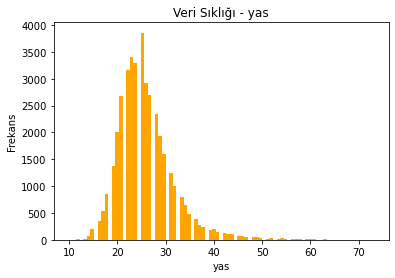

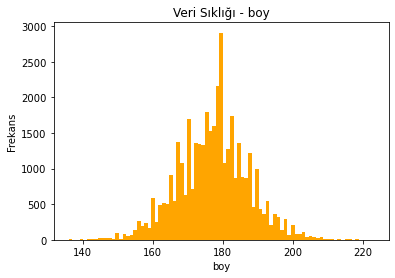

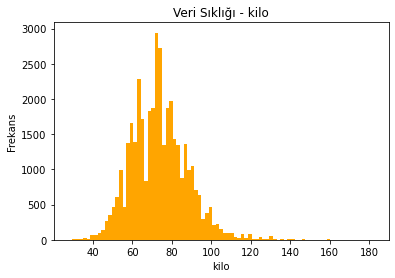

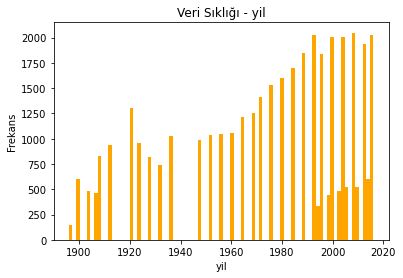

In [16]:
# tüm sayısal değşkenler için histogram çizdirelim
sayisal_degisken = ["yas", "boy", "kilo", "yil"]
for i in sayisal_degisken:
    plotHistogram(i)

In [17]:
veri.describe()

,yas,boy,kilo,yil
count,39783.000000,39044.000000,38292.000000,39783.000000
mean,25.918456,177.374482,73.856625,1973.943845
std,5.859569,10.262177,14.235494,33.822857
min,10.000000,136.000000,28.000000,1896.000000
25%,22.000000,170.000000,64.000000,1952.000000
50%,25.000000,177.480000,73.090000,1984.000000
75%,29.000000,184.000000,82.000000,2002.000000
max,73.000000,223.000000,182.000000,2016.000000


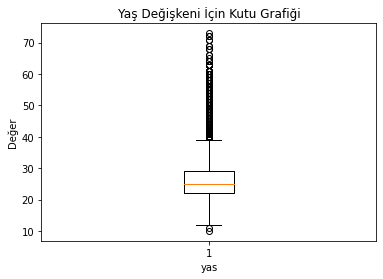

In [18]:
plt.boxplot(veri.yas)
plt.title("Yaş Değişkeni İçin Kutu Grafiği")
plt.xlabel("yas")
plt.ylabel("Değer")
plt.show()

# Kategorik Değişkenler

In [19]:
# çubuk grafiğini çizdirdiğimiz metodlar
def plotBar(degisken, n = 5):
    # girdi: degisken/sütun  , n: gösterilecek eşsiz değer sayısı
    # çıktı: çubuk grafiği
    veri_ = veri[degisken]
    veri_sayma = veri_.value_counts()
    veri_sayma = veri_sayma[:n]
    plt.figure()
    plt.bar(veri_sayma.index, veri_sayma, color = "orange")
    plt.xticks(veri_sayma.index, veri_sayma.index.values)
    plt.xticks(rotation = 45) # 45 derece açı ile durmasını istiyoruz
    plt.ylabel("Frekans")
    plt.title("Veri Sıklığı - {}".format(degisken))
    plt.show()
    print('{}: \n {}'.format(degisken, veri_sayma))

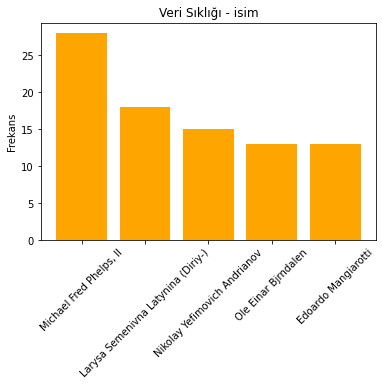

isim: 
 Michael Fred Phelps, II               28
Larysa Semenivna Latynina (Diriy-)    18
Nikolay Yefimovich Andrianov          15
Ole Einar Bjrndalen                   13
Edoardo Mangiarotti                   13
Name: isim, dtype: int64


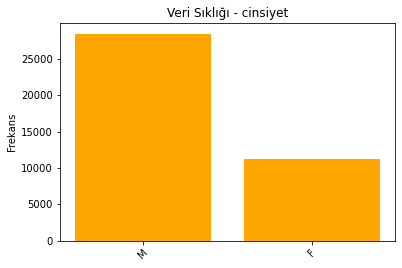

cinsiyet: 
 M    28530
F    11253
Name: cinsiyet, dtype: int64


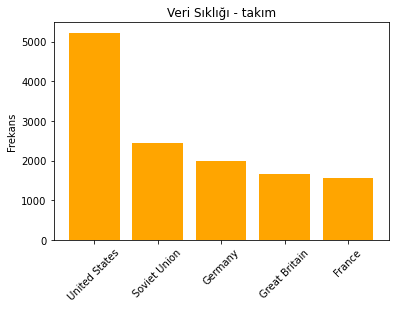

takım: 
 United States    5219
Soviet Union     2451
Germany          1984
Great Britain    1673
France           1550
Name: takım, dtype: int64


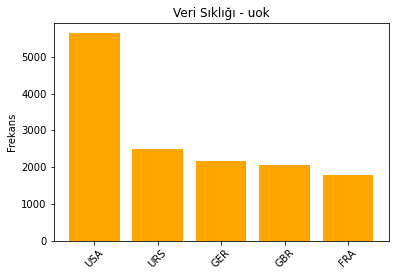

uok: 
 USA    5637
URS    2503
GER    2165
GBR    2068
FRA    1777
Name: uok, dtype: int64


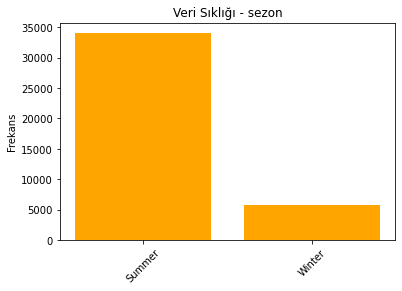

sezon: 
 Summer    34088
Winter     5695
Name: sezon, dtype: int64


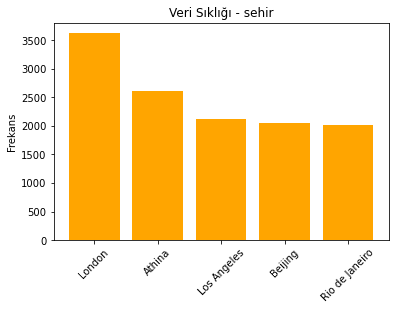

sehir: 
 London            3624
Athina            2602
Los Angeles       2123
Beijing           2048
Rio de Janeiro    2023
Name: sehir, dtype: int64


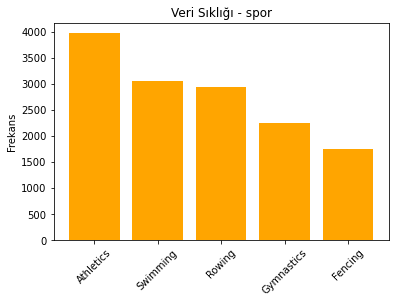

spor: 
 Athletics     3969
Swimming      3048
Rowing        2945
Gymnastics    2256
Fencing       1743
Name: spor, dtype: int64


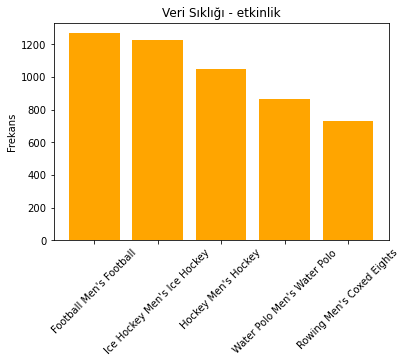

etkinlik: 
 Football Men's Football        1269
Ice Hockey Men's Ice Hockey    1230
Hockey Men's Hockey            1050
Water Polo Men's Water Polo     866
Rowing Men's Coxed Eights       730
Name: etkinlik, dtype: int64


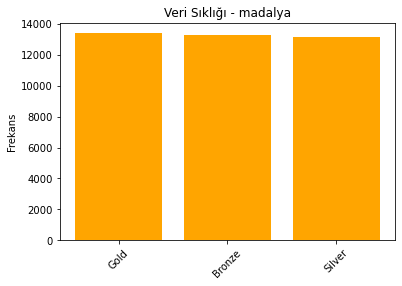

madalya: 
 Gold      13372
Bronze    13295
Silver    13116
Name: madalya, dtype: int64


In [20]:
kategorik_degisken = ["isim", "cinsiyet", "takım", "uok", "sezon", "sehir", "spor", "etkinlik", "madalya"]
for i in kategorik_degisken:
    plotBar(i)

# İki değişkenli karşılaştırma

Cinsiyete göre boy ve ağırlık karşılaştırması

In [21]:
erkek = veri[veri.cinsiyet == "M"]
erkek.head(3)

,isim,cinsiyet,yas,boy,kilo,takım,uok,yil,sezon,sehir,spor,etkinlik,madalya
3,Edgar Lindenau Aabye,M,34.0,182.48,95.62,Denmark/Sweden,DEN,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
37,Arvo Ossian Aaltonen,M,30.0,182.01,76.69,Finland,FIN,1920,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze
38,Arvo Ossian Aaltonen,M,30.0,177.00,75.00,Finland,FIN,1920,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze


In [22]:
kadin = veri[veri.cinsiyet == "F"]
kadin.head(3)

,isim,cinsiyet,yas,boy,kilo,takım,uok,yil,sezon,sehir,spor,etkinlik,madalya
79,Ragnhild Margrethe Aamodt,F,27.0,163.00,68.88,Norway,NOR,2008,Summer,Beijing,Handball,Handball Women's Handball,Gold
91,Willemien Aardenburg,F,22.0,166.13,60.53,Netherlands,NED,1988,Summer,Seoul,Hockey,Hockey Women's Hockey,Bronze
105,Ann Kristin Aarnes,F,23.0,182.00,64.00,Norway,NOR,1996,Summer,Atlanta,Football,Football Women's Football,Bronze


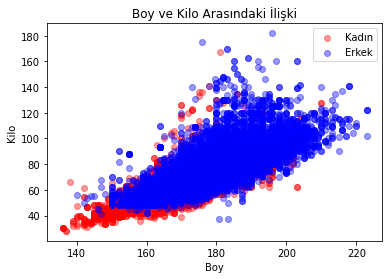

In [23]:
plt.figure()
plt.scatter(kadin.boy, kadin.kilo, alpha = 0.4, label = "Kadın", color = "red") # alpha transparanlığı belirliyor
plt.scatter(erkek.boy, erkek.kilo, alpha = 0.4, label = "Erkek", color = "blue")
plt.xlabel("Boy")
plt.ylabel("Kilo")
plt.title("Boy ve Kilo Arasındaki İlişki")
plt.legend()
plt.show()

In [24]:
veri.loc[:, ['yas', 'boy', 'kilo']].corr() # korrelasyon tablosu

,yas,boy,kilo
yas,1.000000,0.068016,0.161037
boy,0.068016,1.000000,0.795367
kilo,0.161037,0.795367,1.000000


Madalya ve yaş arasındaki ilişki

In [25]:
veri_gecici = veri.copy()
veri_gecici = pd.get_dummies(veri_gecici, columns = ['madalya'])
veri_gecici.head(2)

,isim,cinsiyet,yas,boy,kilo,takım,uok,yil,sezon,sehir,spor,etkinlik,madalya_Bronze,madalya_Gold,madalya_Silver
3,Edgar Lindenau Aabye,M,34.0,182.48,95.62,Denmark/Sweden,DEN,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,0,1,0
37,Arvo Ossian Aaltonen,M,30.0,182.01,76.69,Finland,FIN,1920,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,1,0,0


get_dummies fonksiyonu madalya sütunundaki başlıklara göre alınan madalya sayılarını belirlememizi sağladı

In [26]:
veri_gecici.loc[:, ['yas', 'madalya_Bronze', 'madalya_Gold', 'madalya_Silver']].corr()

,yas,madalya_Bronze,madalya_Gold,madalya_Silver
yas,1.000000,-0.005584,-0.002576,0.008192
madalya_Bronze,-0.005584,1.000000,-0.504110,-0.496859
madalya_Gold,-0.002576,-0.504110,1.000000,-0.499022
madalya_Silver,0.008192,-0.496859,-0.499022,1.000000


Takımların kazandığı altın, gümüş, ve bronz madalya sayıları

In [27]:
veri_gecici[['takım', 'madalya_Bronze', 'madalya_Gold', 'madalya_Silver']].groupby(['takım'], as_index = False).sum().sort_values(by = 'madalya_Gold', ascending = False)[:10]

,takım,madalya_Bronze,madalya_Gold,madalya_Silver
462,United States,1233.0,2474.0,1512.0
403,Soviet Union,677.0,1058.0,716.0
165,Germany,678.0,679.0,627.0
215,Italy,484.0,535.0,508.0
171,Great Britain,572.0,519.0,582.0
149,France,577.0,455.0,518.0
420,Sweden,507.0,451.0,476.0
198,Hungary,365.0,432.0,330.0
67,Canada,408.0,422.0,413.0
117,East Germany,263.0,369.0,309.0


Kazanılan madalyaların hangi şehirde kazanıldığı

In [28]:
veri_gecici[['sehir', 'madalya_Bronze', 'madalya_Gold', 'madalya_Silver']].groupby(['sehir'], as_index = False).sum().sort_values(by = 'madalya_Gold', ascending = False)[:10]

,sehir,madalya_Bronze,madalya_Gold,madalya_Silver
17,London,1214.0,1215.0,1195.0
3,Athina,860.0,883.0,859.0
18,Los Angeles,706.0,726.0,691.0
6,Beijing,710.0,671.0,667.0
27,Rio de Janeiro,703.0,665.0,655.0
38,Sydney,680.0,663.0,661.0
4,Atlanta,629.0,608.0,605.0
5,Barcelona,604.0,559.0,549.0
33,Seoul,549.0,520.0,513.0
2,Antwerpen,367.0,493.0,448.0


Cinsiyete göre alınan madalya türü

In [29]:
veri_gecici[['cinsiyet', 'madalya_Bronze', 'madalya_Gold', 'madalya_Silver']].groupby(['cinsiyet'], as_index = False).sum().sort_values(by = 'madalya_Gold', ascending = False)[:10]

,cinsiyet,madalya_Bronze,madalya_Gold,madalya_Silver
1,M,9524.0,9625.0,9381.0
0,F,3771.0,3747.0,3735.0


# Çok değişkenli veri analizi

# # Pivot Tablosu

In [30]:
veri_pivot = veri.pivot_table(index = 'madalya', columns = 'cinsiyet',
                              values = ['boy', 'kilo', 'yas'],
                              aggfunc = {'boy':np.mean, 'kilo':np.mean, 'yas':[min, max, np.std]})
veri_pivot.head()

boy                   kilo              yas              \
                mean                   mean              max         min   
cinsiyet           F           M          F          M     F     M     F   
madalya                                                                    
Bronze    169.989037  180.130306  62.729649  78.145614  69.0  72.0  12.0   
Gold      170.429068  180.470283  63.161121  78.647238  63.0  64.0  13.0   
Silver    170.222823  180.184804  62.839533  78.368811  55.0  73.0  11.0   

                                    
                     std            
cinsiyet     M         F         M  
madalya                             
Bronze    10.0  5.329229  5.870340  
Gold      13.0  5.219615  5.987807  
Silver    13.0  5.253111  6.098221

# Anomali Tespiti

In [31]:
def anomaliTespiti(df, ozellik):
    outlier_indices = []
    
    for c in ozellik:
        # 1. çeyrek
        Q1 = np.percentile(df[c],25)
        # 3. çeyrek
        Q3 = np.percentile(df[c],75)
        # IQR Inter quantile range (çeyrekler arası menzil)
        IQR = Q3 - Q1
        # aykırı değer için ek adım miktarı
        outlier_step = 1.5 * IQR
        # aykırı değeri ve bulunduğu indeksi tespit edelim
        outlier_list_col = df[(df[c] < Q1 - outlier_step) | (df[c] > Q3 - outlier_step)].index
        # tespit edilen indexleri depolayalım
        outlier_indices.extend(outlier_list_col)
        
    # eşsiz aykırı değerleri bulalım 
    outlier_indices = Counter(outlier_indices)
    # eğer bir özellik birkaç sütunda farklı ise buna aykırı değer diyelim
    multiple_outliers = list(i for i, v in outlier_indices.items() if v > 2)
    
    return multiple_outliers

In [32]:
veri_anomali = veri.loc[anomaliTespiti(veri, ['yas', 'kilo', 'boy'])]
veri_anomali.spor.value_counts()

Series([], Name: spor, dtype: int64)

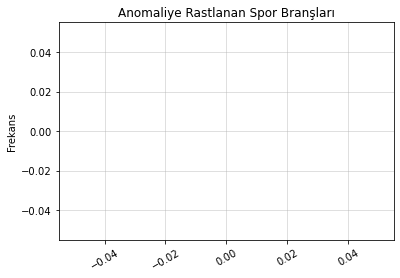

In [33]:
plt.figure()
plt.bar(veri_anomali.spor.value_counts().index, veri_anomali.spor.value_counts().values)
plt.xticks(rotation = 30)
plt.title("Anomaliye Rastlanan Spor Branşları")
plt.ylabel("Frekans")
plt.grid(True, alpha= 0.5)
plt.show()

In [34]:
veri_gym = veri_anomali[veri_anomali.spor == "Gymnastics"]
veri_gym

,isim,cinsiyet,yas,boy,kilo,takım,uok,yil,sezon,sehir,spor,etkinlik,madalya


In [35]:
veri_gym.etkinlik.value_counts()

Series([], Name: etkinlik, dtype: int64)

In [36]:
veri_basketbol = veri_anomali[veri_anomali.spor == "Bastketball"]
veri_basketbol

,isim,cinsiyet,yas,boy,kilo,takım,uok,yil,sezon,sehir,spor,etkinlik,madalya


In [37]:
veri_basketbol.etkinlik.value_counts()

Series([], Name: etkinlik, dtype: int64)

# Zaman Serilerinde Veri Analizi

Yıllara göre ortalama yaş boy kilo değişimi

In [38]:
veri_zaman = veri.copy()
veri_zaman.head(3)

,isim,cinsiyet,yas,boy,kilo,takım,uok,yil,sezon,sehir,spor,etkinlik,madalya
3,Edgar Lindenau Aabye,M,34.0,182.48,95.62,Denmark/Sweden,DEN,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
37,Arvo Ossian Aaltonen,M,30.0,182.01,76.69,Finland,FIN,1920,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze
38,Arvo Ossian Aaltonen,M,30.0,177.00,75.00,Finland,FIN,1920,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze


In [39]:
essiz_yillar = veri_zaman.yil.unique()
essiz_yillar

array([1900, 1920, 2014, 1948, 1952, 1992, 1994, 2002, 2006, 2008, 1988,
       1996, 1960, 1912, 1956, 2016, 2012, 2000, 2004, 1980, 1984, 1936,
       1906, 1964, 1972, 1924, 1904, 1932, 1928, 1968, 1976, 2010, 1908,
       1998, 1896], dtype=int64)

In [40]:
# olimpiyatların yapıldığı yılları sıralayalım
dizili_array = np.sort(essiz_yillar)
dizili_array

array([1896, 1900, 1904, 1906, 1908, 1912, 1920, 1924, 1928, 1932, 1936,
       1948, 1952, 1956, 1960, 1964, 1968, 1972, 1976, 1980, 1984, 1988,
       1992, 1994, 1996, 1998, 2000, 2002, 2004, 2006, 2008, 2010, 2012,
       2014, 2016], dtype=int64)

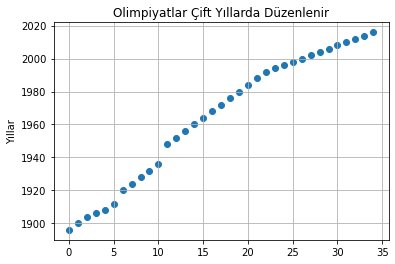

In [41]:
plt.figure()
plt.scatter(range(len(dizili_array)), dizili_array)
plt.grid(True)
plt.ylabel("Yıllar")
plt.title("Olimpiyatlar Çift Yıllarda Düzenlenir")
plt.show()

In [42]:
# veri içerisinde bulunan yıl değerlerini date-time tipine dönüştürelim
tarih_saat_nesnesi = pd.to_datetime(veri_zaman['yil'], format = '%Y')
print(type(tarih_saat_nesnesi))
tarih_saat_nesnesi.head(3)

<class 'pandas.core.series.Series'>


3    1900-01-01
37   1920-01-01
38   1920-01-01
Name: yil, dtype: datetime64[ns]

In [43]:
veri_zaman['tarih_saat'] = tarih_saat_nesnesi
veri_zaman.head(3)

,isim,cinsiyet,yas,boy,kilo,takım,uok,yil,sezon,sehir,spor,etkinlik,madalya,tarih_saat
3,Edgar Lindenau Aabye,M,34.0,182.48,95.62,Denmark/Sweden,DEN,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,1900-01-01
37,Arvo Ossian Aaltonen,M,30.0,182.01,76.69,Finland,FIN,1920,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze,1920-01-01
38,Arvo Ossian Aaltonen,M,30.0,177.00,75.00,Finland,FIN,1920,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze,1920-01-01


In [44]:
# veri zaman değişkeninin ana indeksini, datetime tipi olan tari_saat değerine güncelleyelim
veri_zaman = veri_zaman.set_index('tarih_saat')
veri_zaman.drop(['yil'], axis = 1, inplace = True)
veri_zaman

,isim,cinsiyet,yas,boy,kilo,takım,uok,sezon,sehir,spor,etkinlik,madalya
tarih_saat,,,,,,,,,,,,
1900-01-01,Edgar Lindenau Aabye,M,34.0,182.48,95.62,Denmark/Sweden,DEN,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
1920-01-01,Arvo Ossian Aaltonen,M,30.0,182.01,76.69,Finland,FIN,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze
1920-01-01,Arvo Ossian Aaltonen,M,30.0,177.00,75.00,Finland,FIN,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze
2014-01-01,Juhamatti Tapio Aaltonen,M,28.0,184.00,85.00,Finland,FIN,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,Bronze
1948-01-01,Paavo Johannes Aaltonen,M,28.0,175.00,64.00,Finland,FIN,Summer,London,Gymnastics,Gymnastics Men's Individual All-Around,Bronze
...,...,...,...,...,...,...,...,...,...,...,...,...
1956-01-01,Galina Ivanovna Zybina (-Fyodorova),F,25.0,168.00,80.00,Soviet Union,URS,Summer,Melbourne,Athletics,Athletics Women's Shot Put,Silver
1964-01-01,Galina Ivanovna Zybina (-Fyodorova),F,33.0,168.00,80.00,Soviet Union,URS,Summer,Tokyo,Athletics,Athletics Women's Shot Put,Bronze
1980-01-01,Bogusaw Zych,M,28.0,182.00,82.00,Poland,POL,Summer,Moskva,Fencing,"Fencing Men's Foil, Team",Bronze


In [45]:
veri_zaman.head(3)

,isim,cinsiyet,yas,boy,kilo,takım,uok,sezon,sehir,spor,etkinlik,madalya
tarih_saat,,,,,,,,,,,,
1900-01-01,Edgar Lindenau Aabye,M,34.0,182.48,95.62,Denmark/Sweden,DEN,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
1920-01-01,Arvo Ossian Aaltonen,M,30.0,182.01,76.69,Finland,FIN,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze
1920-01-01,Arvo Ossian Aaltonen,M,30.0,177.00,75.00,Finland,FIN,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze


# Yıllara göre ortalama yaş, kilo ve boy değişimi

In [46]:
periyodik_veri = veri_zaman.resample("2A").mean() # 2 yıllık periyotlar halinde
periyodik_veri.head()

,yas,boy,kilo
tarih_saat,,,
1896-12-31,23.905734,174.033707,73.251491
1898-12-31,NaN,NaN,NaN
1900-12-31,27.786689,179.022374,78.171358
1902-12-31,NaN,NaN,NaN
1904-12-31,26.363868,177.331228,75.343632


In [47]:
# kayıp verileri çıkartalım
periyodik_veri.dropna(axis = 0, inplace = True) # axis = 0 satırları çıkartması için
periyodik_veri.head()

,yas,boy,kilo
tarih_saat,,,
1896-12-31,23.905734,174.033707,73.251491
1900-12-31,27.786689,179.022374,78.171358
1904-12-31,26.363868,177.331228,75.343632
1906-12-31,26.479389,176.604301,75.310328
1908-12-31,27.566739,176.713662,74.486637


<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 432x288 with 0 Axes>

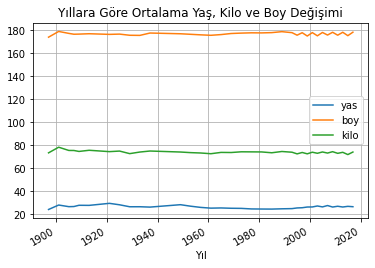

In [48]:
plt.figure()
periyodik_veri.plot()
plt.title("Yıllara Göre Ortalama Yaş, Kilo ve Boy Değişimi")
plt.xlabel("Yıl")
plt.grid(True)
plt.show

In [49]:
# YILLARA GÖRE MADALYA SAYILARI
veri_zaman = pd.get_dummies(veri_zaman, columns = ["madalya"])
veri_zaman.head(3)

,isim,cinsiyet,yas,boy,kilo,takım,uok,sezon,sehir,spor,etkinlik,madalya_Bronze,madalya_Gold,madalya_Silver
tarih_saat,,,,,,,,,,,,,,
1900-01-01,Edgar Lindenau Aabye,M,34.0,182.48,95.62,Denmark/Sweden,DEN,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,0,1,0
1920-01-01,Arvo Ossian Aaltonen,M,30.0,182.01,76.69,Finland,FIN,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,1,0,0
1920-01-01,Arvo Ossian Aaltonen,M,30.0,177.00,75.00,Finland,FIN,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,1,0,0


In [50]:
periyodik_veri = veri_zaman.resample("2A").sum()
periyodik_veri.head()
periyodik_veri = periyodik_veri[~(periyodik_veri == 0).any(axis = 1)]
periyodik_veri.tail()

,yas,boy,kilo,madalya_Bronze,madalya_Gold,madalya_Silver
tarih_saat,,,,,,
2008-12-31,53344.0,365157.91,152090.92,710.0,671.0,667.0
2010-12-31,13896.0,91395.00,37877.12,171.0,174.0,175.0
2012-12-31,50595.0,346091.47,143102.94,679.0,632.0,630.0
2014-12-31,15907.0,104686.00,42838.63,198.0,202.0,197.0
2016-12-31,53256.0,360846.03,149628.71,703.0,665.0,655.0


<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 432x288 with 0 Axes>

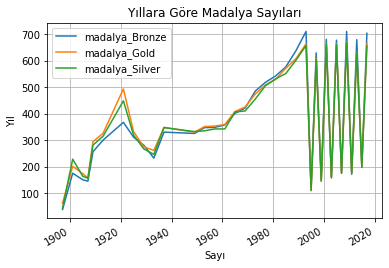

In [51]:
plt.figure()
periyodik_veri.loc[:,["madalya_Bronze", "madalya_Gold", "madalya_Silver"]].plot()
plt.title("Yıllara Göre Madalya Sayıları")
plt.xlabel("Sayı")
plt.ylabel("Yıl")
plt.grid(True)
plt.show

In [52]:
yaz = veri_zaman[veri_zaman.sezon == "Summer"]
kis = veri_zaman[veri_zaman.sezon == "Winter"]
kis.head(3)

,isim,cinsiyet,yas,boy,kilo,takım,uok,sezon,sehir,spor,etkinlik,madalya_Bronze,madalya_Gold,madalya_Silver
tarih_saat,,,,,,,,,,,,,,
2014-01-01,Juhamatti Tapio Aaltonen,M,28.0,184.0,85.0,Finland,FIN,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,1,0,0
1992-01-01,Kjetil Andr Aamodt,M,20.0,176.0,85.0,Norway,NOR,Winter,Albertville,Alpine Skiing,Alpine Skiing Men's Super G,0,1,0
1992-01-01,Kjetil Andr Aamodt,M,20.0,176.0,85.0,Norway,NOR,Winter,Albertville,Alpine Skiing,Alpine Skiing Men's Giant Slalom,1,0,0


In [53]:
periyodik_veri_kis = kis.resample("A").sum()
periyodik_veri_kis = periyodik_veri_kis[~(periyodik_veri_kis == 0).any(axis = 1)]
periyodik_veri_kis.head()

,yas,boy,kilo,madalya_Bronze,madalya_Gold,madalya_Silver
tarih_saat,,,,,,
1924-12-31,3919.60,17081.06,7370.48,37,55,38
1928-12-31,2265.56,15745.75,6862.50,31,30,28
1932-12-31,2431.00,16357.71,7067.76,28,32,32
1936-12-31,2742.00,19123.20,8101.88,35,36,37
1948-12-31,3643.00,23942.51,10375.92,46,41,48


In [54]:
periyodik_veri_yaz = yaz.resample("A").sum()
periyodik_veri_yaz = periyodik_veri_yaz[~(periyodik_veri_yaz == 0).any(axis = 1)]
periyodik_veri_yaz.head()

,yas,boy,kilo,madalya_Bronze,madalya_Gold,madalya_Silver
tarih_saat,,,,,,
1896-12-31,3418.52,20187.91,8350.67,38.0,62.0,43.0
1900-12-31,16783.16,74652.33,27047.29,175.0,201.0,228.0
1904-12-31,12812.84,82281.69,28630.58,150.0,173.0,163.0
1906-12-31,12127.56,64460.57,25228.96,145.0,157.0,156.0
1908-12-31,22907.96,141370.93,49384.64,256.0,294.0,281.0


<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 432x288 with 0 Axes>

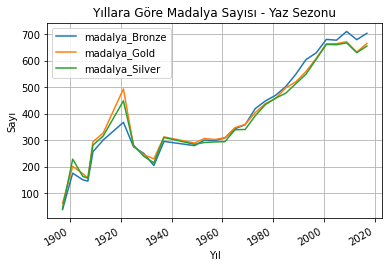

<Figure size 432x288 with 0 Axes>

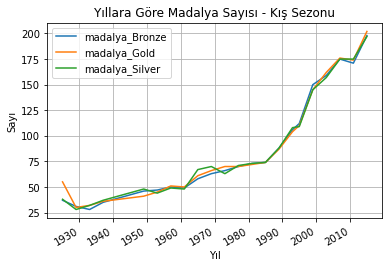

In [56]:
plt.figure()
periyodik_veri_yaz.loc[:,["madalya_Bronze", "madalya_Gold", "madalya_Silver"]].plot()
plt.title("Yıllara Göre Madalya Sayısı - Yaz Sezonu")
plt.xlabel("Yıl")
plt.ylabel("Sayı")
plt.grid(True)
plt.show


plt.figure()
periyodik_veri_kis.loc[:,["madalya_Bronze", "madalya_Gold", "madalya_Silver"]].plot()
plt.title("Yıllara Göre Madalya Sayısı - Kış Sezonu")
plt.xlabel("Yıl")
plt.ylabel("Sayı")
plt.grid(True)
plt.show